#  Prepare City Information

We want to get information about cities to group them to several classes, and then we can classify concert location later on. Here we mainly have city information among eight aspects: cost of living index, education level, median of household income, per capita income, population density, racial diversity, the ratio of average income to average gross rent, urban population. Initially we want to use all eight features to cluster cities. However, since it is so hard to tell the meaning of 8 features, we only focused on per capita income and population density, which are most commonly used features in city classification. 



All the city data are from City-Data.com

In [1]:
import pandas as pd
import numpy as np
from re import sub
from decimal import Decimal
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering

%matplotlib inline

In [2]:
df_city = pd.read_json(path_or_buf = "City_infos_total.json" )
print(df_city.shape)
df_city.head()

(6700, 9)


,Cost_of_living_index,Education_level_Bachelor_or_higher_percent,Estimated_median_household_income,Estimated_per_capita_income,Population_density,Racial_diversity,Ratio_of_average_income_to_average_gross_rent,Urban_population,city_name
0,97.9,0.77%,"$54,095","$23,068",-,48.2,55.8,-,"[Oasis, CA ]"
1,86.8,1.35%,"$27,401","$8,676",32.9,16.0,53.7,-,"[Gila River, AZ ]"
2,79.8,1.42%,"$26,195","$7,972","11,637",19.0,47.7,-,"[Cameron Park, TX ]"
3,105.0,1.46%,"$25,749","$7,606","6,616",49.1,39.7,-,"[Mecca, CA ]"
4,86.8,1.57%,"$23,392","$8,552","6,122",30.1,41,99.9%,"[Mendota, CA ]"


# 1. Clean data

We clean data by changing strings to integers, in order to analyse well

In [3]:
def get_city_name(string):
    group = string.split(",")
    city_name = group[0]
    city_name = city_name.replace(" ", "")
    
    return city_name

In [4]:
df_city.city_name = df_city.city_name.apply(lambda x: x[0])
print(df_city.shape)
df_city.head()

(6700, 9)


,Cost_of_living_index,Education_level_Bachelor_or_higher_percent,Estimated_median_household_income,Estimated_per_capita_income,Population_density,Racial_diversity,Ratio_of_average_income_to_average_gross_rent,Urban_population,city_name
0,97.9,0.77%,"$54,095","$23,068",-,48.2,55.8,-,"Oasis, CA"
1,86.8,1.35%,"$27,401","$8,676",32.9,16.0,53.7,-,"Gila River, AZ"
2,79.8,1.42%,"$26,195","$7,972","11,637",19.0,47.7,-,"Cameron Park, TX"
3,105.0,1.46%,"$25,749","$7,606","6,616",49.1,39.7,-,"Mecca, CA"
4,86.8,1.57%,"$23,392","$8,552","6,122",30.1,41,99.9%,"Mendota, CA"


In [5]:
df_city.city_name = df_city.city_name.apply(lambda x: get_city_name(x))
print(df_city.shape)
df_city.head()

(6700, 9)


,Cost_of_living_index,Education_level_Bachelor_or_higher_percent,Estimated_median_household_income,Estimated_per_capita_income,Population_density,Racial_diversity,Ratio_of_average_income_to_average_gross_rent,Urban_population,city_name
0,97.9,0.77%,"$54,095","$23,068",-,48.2,55.8,-,Oasis
1,86.8,1.35%,"$27,401","$8,676",32.9,16.0,53.7,-,GilaRiver
2,79.8,1.42%,"$26,195","$7,972","11,637",19.0,47.7,-,CameronPark
3,105.0,1.46%,"$25,749","$7,606","6,616",49.1,39.7,-,Mecca
4,86.8,1.57%,"$23,392","$8,552","6,122",30.1,41,99.9%,Mendota


In [6]:
df_city = df_city.replace("-", np.nan)
df_city = df_city.dropna()
df_city = df_city.reset_index()
df_city = df_city.drop(columns = ["index"])
print(df_city.shape)
df_city.head()

(4059, 9)


,Cost_of_living_index,Education_level_Bachelor_or_higher_percent,Estimated_median_household_income,Estimated_per_capita_income,Population_density,Racial_diversity,Ratio_of_average_income_to_average_gross_rent,Urban_population,city_name
0,86.8,1.57%,"$23,392","$8,552","6,122",30.1,41,99.9%,Mendota
1,87.5,1.89%,"$21,869","$8,696","5,062",29.7,42.4,99.9%,Huron
2,83.2,2.41%,"$31,862","$9,946","4,224",43.4,38.6,99.4%,Arvin
3,84.2,3.08%,"$19,525","$9,812","2,376",30.1,47.2,94.8%,Anthony
4,84.6,3.24%,"$31,301","$7,968","3,646",57.4,37.7,99.6%,Corcoran


In [7]:
def to_int(string):
    
    if isinstance(string,str):
        value = int(Decimal(sub(r'[^\d.]', '', string)))
    else:
        value = int(string)
    return value

print(to_int("$8,552"))

8552


In [8]:
X = df_city.drop(columns = ["city_name"])
col_names = list(X)
print(col_names)

['Cost_of_living_index', 'Education_level_Bachelor_or_higher_percent', 'Estimated_median_household_income', 'Estimated_per_capita_income', 'Population_density', 'Racial_diversity', 'Ratio_of_average_income_to_average_gross_rent', 'Urban_population']


In [9]:
for col in col_names:
    X[col] = X[col].apply(lambda x: to_int(x))

print(X.shape)
X.head()

(4059, 8)


,Cost_of_living_index,Education_level_Bachelor_or_higher_percent,Estimated_median_household_income,Estimated_per_capita_income,Population_density,Racial_diversity,Ratio_of_average_income_to_average_gross_rent,Urban_population
0,86,1,23392,8552,6122,30,41,99
1,87,1,21869,8696,5062,29,42,99
2,83,2,31862,9946,4224,43,38,99
3,84,3,19525,9812,2376,30,47,94
4,84,3,31301,7968,3646,57,37,99


In [10]:
df_city_clean = X
df_city_clean["city_name"] = df_city["city_name"]
df_city_clean.head()

,Cost_of_living_index,Education_level_Bachelor_or_higher_percent,Estimated_median_household_income,Estimated_per_capita_income,Population_density,Racial_diversity,Ratio_of_average_income_to_average_gross_rent,Urban_population,city_name
0,86,1,23392,8552,6122,30,41,99,Mendota
1,87,1,21869,8696,5062,29,42,99,Huron
2,83,2,31862,9946,4224,43,38,99,Arvin
3,84,3,19525,9812,2376,30,47,94,Anthony
4,84,3,31301,7968,3646,57,37,99,Corcoran


In [11]:
df_city_clean = df_city_clean.groupby(by = "city_name",as_index = False).mean()
print(df_city_clean.shape)
df_city_clean.head()

(3289, 9)


,city_name,Cost_of_living_index,Education_level_Bachelor_or_higher_percent,Estimated_median_household_income,Estimated_per_capita_income,Population_density,Racial_diversity,Ratio_of_average_income_to_average_gross_rent,Urban_population
0,Abbeville,82.0,10.00,28740.0,17728.00,2202.0,57.0,52.00,98.0
1,Aberdeen,90.0,22.75,44338.5,23019.75,1783.5,39.0,63.75,98.5
2,Abilene,81.0,22.00,46967.5,22691.00,1378.0,27.0,70.50,97.5
3,Abingdon,83.0,34.00,37730.0,27921.00,984.0,22.0,66.00,96.0
4,Absecon,104.0,25.00,59237.0,28414.00,1469.0,50.0,50.00,96.0


In [12]:
X = df_city_clean.drop(columns = ["city_name"])

# 2. Normalize data

We try min-max scale method to manipulate data

In [13]:
def MIN_MAX_SCALER(X_train):
    column_name = list(X_train.head(0))
    scaler = MinMaxScaler().fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = column_name)
    #X_test = pd.DataFrame(scaler.transform(X_test), columns = column_name)
    return X_train

df_city_norm1 = MIN_MAX_SCALER(X)

In [14]:
df_city_norm1.head()

,Cost_of_living_index,Education_level_Bachelor_or_higher_percent,Estimated_median_household_income,Estimated_per_capita_income,Population_density,Racial_diversity,Ratio_of_average_income_to_average_gross_rent,Urban_population
0,0.08,0.119403,0.064469,0.104210,0.037125,0.7000,0.134737,0.980
1,0.16,0.309701,0.159428,0.148442,0.030059,0.4750,0.184211,0.985
2,0.07,0.298507,0.175433,0.145694,0.023213,0.3250,0.212632,0.975
3,0.09,0.477612,0.119198,0.189411,0.016562,0.2625,0.193684,0.960
4,0.30,0.343284,0.250126,0.193532,0.024750,0.6125,0.126316,0.960


In [15]:
df_city_norm1 = df_city_norm1[["Population_density","Estimated_per_capita_income"]]
df_city_norm1.head()
# df_city_norm1["Cherry's index"] = df_city_norm1["Cost_of_living_index"] * 0.1 + df_city_norm1["Education_level_Bachelor_or_higher_percent"] * 0.1 + df_city_norm1["Estimated_median_household_income"] * 0.1 + df_city_norm1["Estimated_per_capita_income"] * 0.1 + df_city_norm1["Population_density"] * 0.3 + df_city_norm1["Racial_diversity"] * 0.1 + df_city_norm1["Ratio_of_average_income_to_average_gross_rent"] * 0.1 + df_city_norm1["Urban_population"] * 0.1
# df_city_norm1["Cherry's index"].head()

,Population_density,Estimated_per_capita_income
0,0.037125,0.104210
1,0.030059,0.148442
2,0.023213,0.145694
3,0.016562,0.189411
4,0.024750,0.193532


# 3. Clustering

We use K-means to cluster cities. We have been continuously trying to assemble into different number of cities and to use various features.
By testing it in Build Model notebook, we finally determine our optimal combination of features.

In [16]:
K_index = 20
score_infos = []
for K in range(3, K_index):
    kmeans = KMeans(n_clusters=K, random_state=1, n_init = 30).fit(df_city_norm1)
    score = kmeans.inertia_
    score_info = {"K": K,
                  "score": score}
    score_infos.append(score_info)
    
print(score_infos)

[{'score': 11.915125559484249, 'K': 3}, {'score': 9.100240797642883, 'K': 4}, {'score': 7.303483658570769, 'K': 5}, {'score': 6.304403725671783, 'K': 6}, {'score': 5.552446547263504, 'K': 7}, {'score': 4.941933654119826, 'K': 8}, {'score': 4.344695723315941, 'K': 9}, {'score': 3.86995932410298, 'K': 10}, {'score': 3.546492461716004, 'K': 11}, {'score': 3.216622659754722, 'K': 12}, {'score': 2.9831408406161506, 'K': 13}, {'score': 2.7610255362770726, 'K': 14}, {'score': 2.5543155329161786, 'K': 15}, {'score': 2.3800296315199, 'K': 16}, {'score': 2.2170334027820937, 'K': 17}, {'score': 2.0785980800754302, 'K': 18}, {'score': 1.9852226227512881, 'K': 19}]


In [17]:
score_infos = pd.DataFrame(score_infos)
score_infos.head()

,K,score
0,3,11.915126
1,4,9.100241
2,5,7.303484
3,6,6.304404
4,7,5.552447


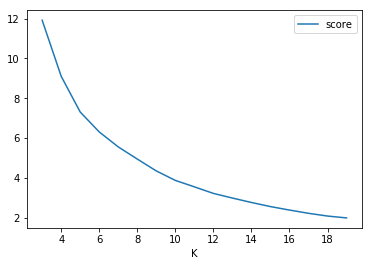

In [18]:
score_infos.plot(x = "K", y = "score",)

In [19]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df_city_norm1)
labels = kmeans.labels_

In [20]:
y_pred = kmeans.predict(df_city_norm1)
#df_city_norm1["Class"] = y_pred 

In [21]:
print(df_city_norm1.shape)
df_city_norm1.head()

(3289, 2)


,Population_density,Estimated_per_capita_income
0,0.037125,0.104210
1,0.030059,0.148442
2,0.023213,0.145694
3,0.016562,0.189411
4,0.024750,0.193532


In [22]:
df_city_norm1["Class"] = y_pred 
df_city_norm1.head()

,Population_density,Estimated_per_capita_income,Class
0,0.037125,0.104210,0
1,0.030059,0.148442,2
2,0.023213,0.145694,2
3,0.016562,0.189411,2
4,0.024750,0.193532,2


In [23]:
df_city_clean["Class"] = y_pred 
df_city_clean = df_city_clean[["city_name","Population_density", "Estimated_per_capita_income", "Class"]]
print(df_city_clean.shape)
df_city_clean.head()

(3289, 4)


,city_name,Population_density,Estimated_per_capita_income,Class
0,Abbeville,2202.0,17728.00,0
1,Aberdeen,1783.5,23019.75,2
2,Abilene,1378.0,22691.00,2
3,Abingdon,984.0,27921.00,2
4,Absecon,1469.0,28414.00,2


In [24]:
city_info = df_city_clean
city_info["city"] = df_city_clean["city_name"]
city_info = city_info.drop(columns = "city_name")
print(city_info.shape)
city_info.head()


(3289, 4)


,Population_density,Estimated_per_capita_income,Class,city
0,2202.0,17728.00,0,Abbeville
1,1783.5,23019.75,2,Aberdeen
2,1378.0,22691.00,2,Abilene
3,984.0,27921.00,2,Abingdon
4,1469.0,28414.00,2,Absecon


In [25]:
city_info.to_csv("city_info.csv")

# Draw the Map

Since we want to see the distribution straightforward, we use plotly geometrically present our cluster result

In [26]:
geocity = pd.read_csv("uscitiesv1.4.csv")
geocity.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Prairie Ridge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,Wautauga Beach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659


In [27]:
geocity.city = geocity.city.apply(lambda x: get_city_name(x))
print(geocity.shape)
geocity.head()

(36651, 16)


,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,PrairieRidge,Prairie Ridge,WA,Washington,53053,Pierce,47.1443,-122.1408,NaN,NaN,1349.8,polygon,False,America/Los_Angeles,98360 98391,1840037882
1,Edison,Edison,WA,Washington,53057,Skagit,48.5602,-122.4311,NaN,NaN,127.4,polygon,False,America/Los_Angeles,98232,1840017314
2,Packwood,Packwood,WA,Washington,53041,Lewis,46.6085,-121.6702,NaN,NaN,213.9,polygon,False,America/Los_Angeles,98361,1840025265
3,WautaugaBeach,Wautauga Beach,WA,Washington,53035,Kitsap,47.5862,-122.5482,NaN,NaN,261.7,point,False,America/Los_Angeles,98366,1840037725
4,Harper,Harper,WA,Washington,53035,Kitsap,47.5207,-122.5196,NaN,NaN,342.1,point,False,America/Los_Angeles,98366,1840037659


In [28]:
geocity = geocity.dropna().reset_index().drop(columns="index")
print(geocity.shape)
geocity.head()

(19361, 16)


,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,population_proper,density,source,incorporated,timezone,zips,id
0,Kahlotus,Kahlotus,WA,Washington,53021,Franklin,46.6436,-118.5566,189.0,189.0,156.0,polygon,True,America/Los_Angeles,99335,1840018478
1,Washtucna,Washtucna,WA,Washington,53001,Adams,46.7539,-118.3104,195.0,195.0,108.0,polygon,True,America/Los_Angeles,99371,1840022312
2,Toledo,Toledo,WA,Washington,53041,Lewis,46.4412,-122.8494,738.0,738.0,708.0,polygon,True,America/Los_Angeles,98591,1840021162
3,Renton,Renton,WA,Washington,53033,King,47.4757,-122.1904,100953.0,100953.0,1663.0,polygon,True,America/Los_Angeles,98059 98058 98057 98056 98055,1840019827
4,Chehalis,Chehalis,WA,Washington,53041,Lewis,46.6649,-122.9660,7498.0,7498.0,523.0,polygon,True,America/Los_Angeles,98532,1840018472


In [29]:
geocity = geocity[["city","lat","lng"]]
print(geocity.shape)
geocity.head()

(19361, 3)


,city,lat,lng
0,Kahlotus,46.6436,-118.5566
1,Washtucna,46.7539,-118.3104
2,Toledo,46.4412,-122.8494
3,Renton,47.4757,-122.1904
4,Chehalis,46.6649,-122.9660


In [30]:
geocity = geocity.groupby(by = "city", as_index = False).mean()
print(geocity.shape)
geocity.head()

(12564, 3)


,city,lat,lng
0,Abbeville,32.44322,-86.5132
1,Abbotsford,44.94370,-90.3154
2,Abbott,31.88740,-97.0805
3,Abbottstown,39.88430,-76.9888
4,Abbyville,37.97040,-98.2040


In [31]:
city_map = pd.merge(city_info, geocity, on = "city", how = "inner")
print(city_map.shape)
city_map.head()

(3234, 6)


,Population_density,Estimated_per_capita_income,Class,city,lat,lng
0,2202.0,17728.00,0,Abbeville,32.443220,-86.513200
1,1783.5,23019.75,2,Aberdeen,40.362114,-94.720486
2,1378.0,22691.00,2,Abilene,35.688600,-98.481550
3,984.0,27921.00,2,Abingdon,38.756400,-86.186000
4,1469.0,28414.00,2,Absecon,39.422100,-74.494100


In [32]:
city_map[city_map["city"]=="NewYork"]

,Population_density,Estimated_per_capita_income,Class,city,lat,lng
2007,27714.0,32540.0,4,NewYork,40.6943,-73.9249


In [33]:
city_map[city_map["city"]=="LosAngeles"]

,Population_density,Estimated_per_capita_income,Class,city,lat,lng
1651,8281.0,27778.0,4,LosAngeles,34.114,-118.4068


In [34]:
city_map.groupby(by = "Class").count()

,Population_density,Estimated_per_capita_income,city,lat,lng
Class,,,,,
0,1051,1051,1051,1051,1051
1,600,600,600,600,600
2,1197,1197,1197,1197,1197
3,227,227,227,227,227
4,130,130,130,130,130
5,29,29,29,29,29


In [35]:
import plotly.plotly as py
#API Key:TMXTQKoaPAga906Zf8jQ
import pandas as pd

py.sign_in('xy838', 'TMXTQKoaPAga906Zf8jQ')

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df = city_map
df.head()

#df['text'] = df['city'] + '<br>Population ' + (df['Urban_population']/1e6).astype(str)+' million'
classes = [0,1,2,3,4,5,6,7,8,9]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey",
          "rgb(0,50,217)","rgb(200,65,54)","rgb(90,20,75)","rgb(255,0,27)","rgb(255,50,27)"
         ]
cities = []
scale = 100

for i in range(len(classes)):
    class_ = classes[i]
    df_sub = df[df["Class"] == class_].reset_index().drop(columns = "index")
    
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['city'],
        marker = dict(
            size = 5, 
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = "Class " + str(class_))
    cities.append(city)

layout = dict(
        title = 'US City Classification',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict(data=cities, layout=layout)
py.iplot(fig, validate=False, filename='d3-bubble-map-populations')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~xy838/0 or inside your plot.ly account where it is named 'd3-bubble-map-populations'


# Explore Statistics of Each Class

By .describe() function, we can see clearly that some index of each feature, which help us to manipulate training data and test data later on

In [36]:
city_summary = city_info.groupby(by = "Class").describe(percentiles = [0.5])
city_summary = city_summary.astype(int)
city_summary

Estimated_per_capita_income                                      \
                            count   mean    std    min    50%     max   
Class                                                                   
0                            1067  18429   2740   7794  18904   22442   
1                             611  34348   3137  29428  33942   41316   
2                            1221  25489   2303  20906  25240   30241   
3                             229  47373   5159  40048  46211   60483   
4                             131  22757   7252   5261  22841   49858   
5                              30  75038  13140  61185  72414  124895   

      Population_density                                   
                   count   mean   std   min    50%    max  
Class                                                      
0                   1067   2225  1387    65   1814   7459  
1                    611   2994  1755     3   2725  10188  
2                   1221   2662  1474    12   2369   7351  
3                    229   3956  2839   260   3360  18765  
4                    131  11917  5704  7462  10696  59236  
5                     30   2067  1353   402   1700   5905

In [37]:
summaies = []
class_ = 0
summary_ = city_info[city_info["Class"] == class_]
summaies.append(summary_)
summary_.describe().T


,count,mean,std,min,25%,50%,75%,max
Population_density,1067.0,2225.230951,1387.216403,65.0,1240.5,1814.0,2916.5,7459.0
Estimated_per_capita_income,1067.0,18429.127731,2740.361311,7794.0,17046.5,18904.0,20553.5,22442.0
Class,1067.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [38]:
class_ = 1
summary_ = city_info[city_info["Class"] == class_]
summaies.append(summary_)
summary_.describe().T


,count,mean,std,min,25%,50%,75%,max
Population_density,611.0,2994.391080,1755.633488,3.0,1726.0,2725.0,3880.8,10188.0
Estimated_per_capita_income,611.0,34348.698254,3137.675060,29428.0,31550.0,33942.5,36849.5,41316.0
Class,611.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [39]:
class_ = 2
summary_ = city_info[city_info["Class"] == class_]
summaies.append(summary_)
summary_.describe().T


,count,mean,std,min,25%,50%,75%,max
Population_density,1221.0,2662.929933,1474.883889,12.0,1549.000000,2369.0,3509.0,7351.0
Estimated_per_capita_income,1221.0,25489.428018,2303.759865,20906.0,23474.666667,25240.0,27416.0,30241.0
Class,1221.0,2.000000,0.000000,2.0,2.000000,2.0,2.0,2.0


In [40]:
class_ = 3
summary_ = city_info[city_info["Class"] == class_]
summaies.append(summary_)
summary_.describe().T


,count,mean,std,min,25%,50%,75%,max
Population_density,229.0,3956.546579,2839.221312,260.0,2110.0,3360.0,4773.0,18765.0
Estimated_per_capita_income,229.0,47373.182678,5159.853432,40048.0,43180.0,46211.0,50885.0,60483.0
Class,229.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


In [41]:
class_ = 4
summary_ = city_info[city_info["Class"] == class_]
summaies.append(summary_)
summary_.describe().T


,count,mean,std,min,25%,50%,75%,max
Population_density,131.0,11917.783715,5704.998257,7462.0,8717.50,10696.0,12754.0,59236.0
Estimated_per_capita_income,131.0,22757.312341,7252.969250,5261.0,17265.25,22841.0,27804.5,49858.0
Class,131.0,4.000000,0.000000,4.0,4.00,4.0,4.0,4.0


In [42]:
class_ = 5
summary_ = city_info[city_info["Class"] == class_]
summaies.append(summary_)
summary_.describe().T


,count,mean,std,min,25%,50%,75%,max
Population_density,30.0,2067.466667,1353.334419,402.0,1176.00,1700.0,2712.0,5905.0
Estimated_per_capita_income,30.0,75038.550000,13140.682366,61185.0,66162.25,72414.0,79163.0,124895.0
Class,30.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0


Although we classified cities into 6 groups in the first place, there are actually only 5 classes of cities held concerts. Thus, our classification problem is to classify cities into 5 groups. 